# 06 - Data Quality Visualization

## Introduction

Data quality visualization is crucial for data engineers. You need to identify missing data, outliers, data distributions, and anomalies before processing data. This notebook covers visualization techniques for data quality assessment.

## What You'll Learn

- Visualizing missing data patterns
- Outlier detection and visualization
- Data distribution comparisons
- Before/after data cleaning visualization
- Data quality dashboards


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches


## Visualizing Missing Data

Missing data is a common issue in real-world datasets. Visualizing missing data patterns helps you understand the extent and pattern of missingness.


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25429/2985864947.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(missing_percent.index, rotation=45, ha='right')


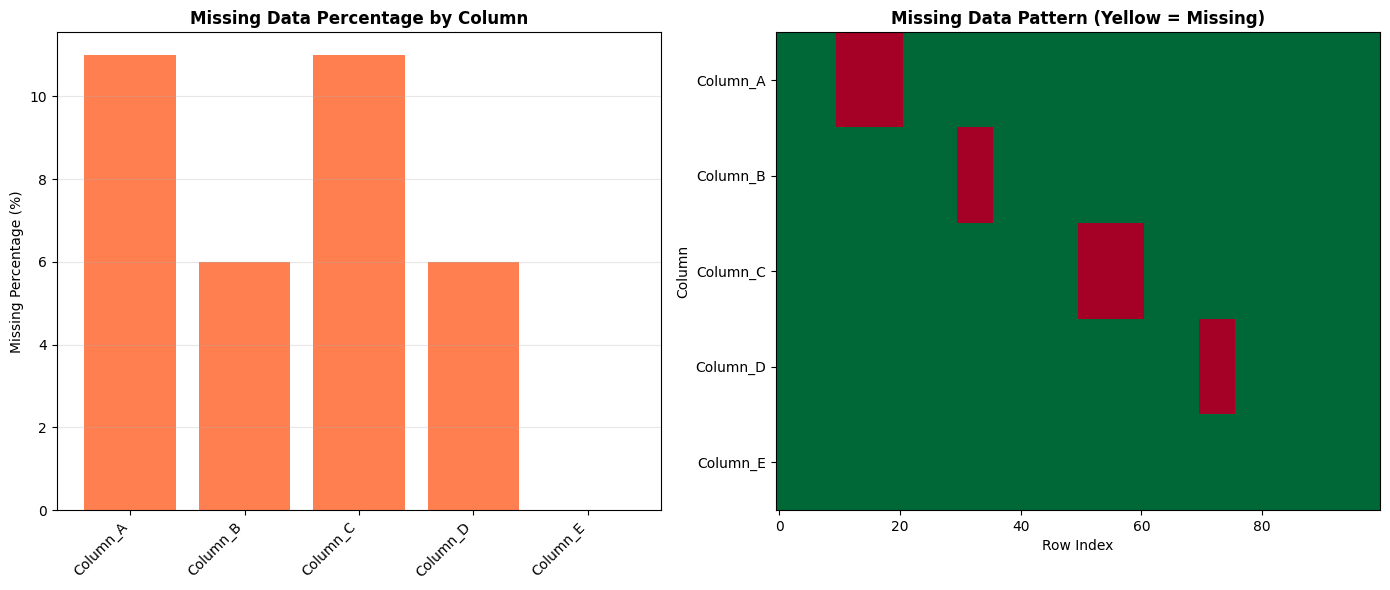

In [2]:
# Create sample data with missing values
np.random.seed(42)
data = pd.DataFrame({
    'Column_A': np.random.randn(100),
    'Column_B': np.random.randn(100),
    'Column_C': np.random.randn(100),
    'Column_D': np.random.randn(100),
    'Column_E': np.random.randn(100)
})

# Introduce missing values
data.loc[10:20, 'Column_A'] = np.nan
data.loc[30:35, 'Column_B'] = np.nan
data.loc[50:60, 'Column_C'] = np.nan
data.loc[70:75, 'Column_D'] = np.nan

# Calculate missing data percentage
missing_percent = (data.isnull().sum() / len(data)) * 100

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of missing percentages
axes[0].bar(missing_percent.index, missing_percent.values, color='coral')
axes[0].set_title('Missing Data Percentage by Column', fontweight='bold')
axes[0].set_ylabel('Missing Percentage (%)')
axes[0].set_xticklabels(missing_percent.index, rotation=45, ha='right')
axes[0].grid(True, axis='y', alpha=0.3)

# Heatmap of missing data
missing_matrix = data.isnull()
im = axes[1].imshow(missing_matrix.T, cmap='RdYlGn_r', aspect='auto')
axes[1].set_title('Missing Data Pattern (Yellow = Missing)', fontweight='bold')
axes[1].set_xlabel('Row Index')
axes[1].set_ylabel('Column')
axes[1].set_yticks(range(len(data.columns)))
axes[1].set_yticklabels(data.columns)

plt.tight_layout()
plt.show()


## Outlier Detection Visualization

Box plots and scatter plots are excellent for identifying outliers.


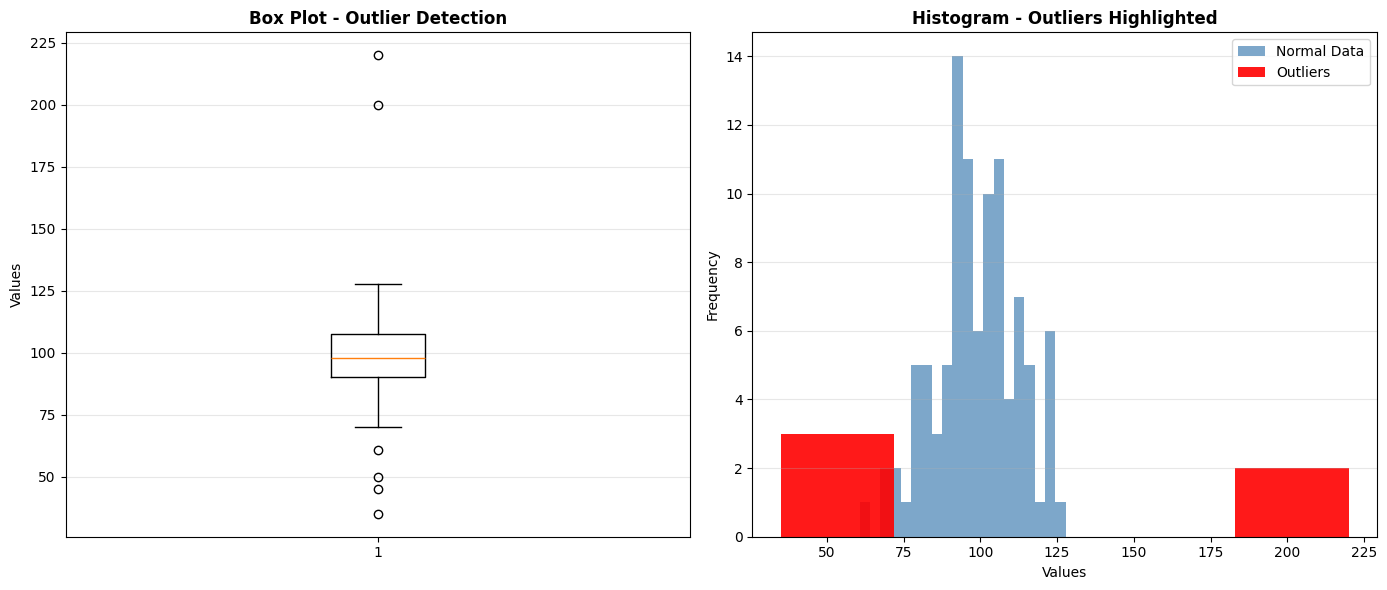

In [3]:
# Create data with outliers
np.random.seed(42)
normal_data = np.random.normal(100, 15, 100)
outliers = np.array([50, 200, 45, 220, 35])  # Outliers
data_with_outliers = np.concatenate([normal_data, outliers])

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
axes[0].boxplot(data_with_outliers, vert=True)
axes[0].set_title('Box Plot - Outlier Detection', fontweight='bold')
axes[0].set_ylabel('Values')
axes[0].grid(True, axis='y', alpha=0.3)

# Histogram with outlier highlighting
axes[1].hist(normal_data, bins=20, alpha=0.7, label='Normal Data', color='steelblue')
axes[1].hist(outliers, bins=5, alpha=0.9, label='Outliers', color='red')
axes[1].set_title('Histogram - Outliers Highlighted', fontweight='bold')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## Before/After Data Cleaning

Visualizing data before and after cleaning helps validate your data quality improvements.


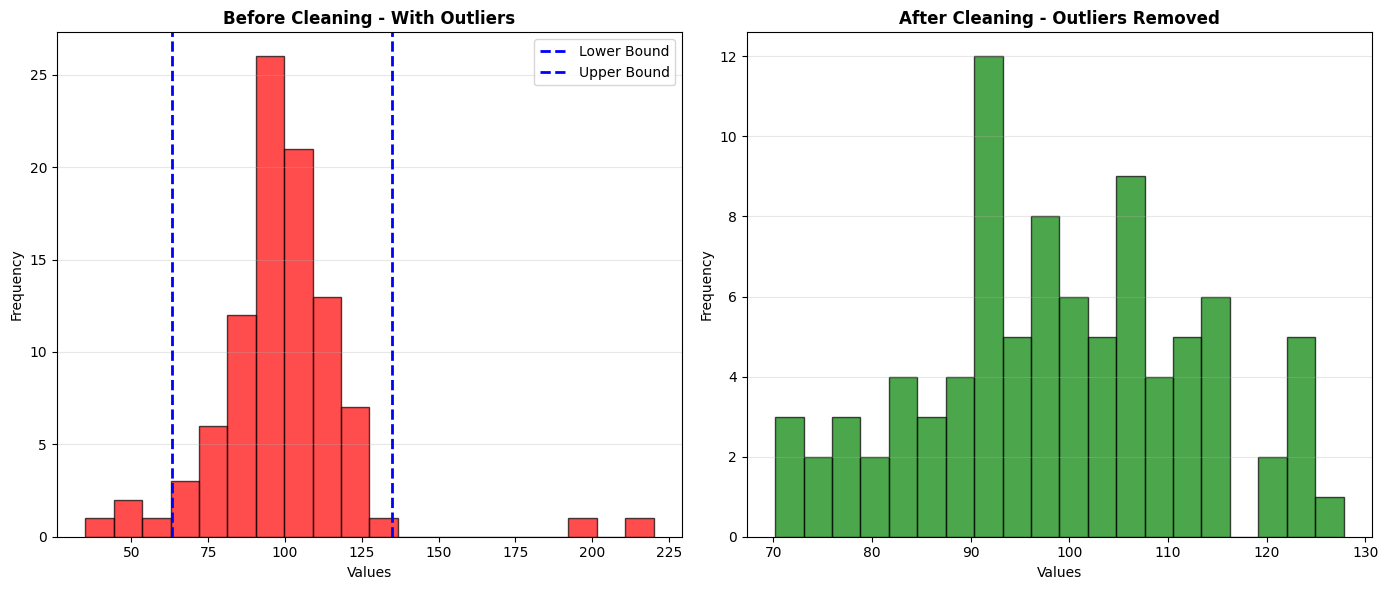

Before cleaning: 95 records
After cleaning: 89 records
Outliers removed: 6


In [4]:
# Create "dirty" data
np.random.seed(42)
dirty_data = pd.DataFrame({
    'Value': np.concatenate([
        np.random.normal(100, 15, 90),  # Normal data
        [50, 200, 45, 220, 35]  # Outliers
    ])
})

# Clean data (remove outliers using IQR method)
Q1 = dirty_data['Value'].quantile(0.25)
Q3 = dirty_data['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_data = dirty_data[(dirty_data['Value'] >= lower_bound) & 
                        (dirty_data['Value'] <= upper_bound)]

# Visualize before and after
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before cleaning
axes[0].hist(dirty_data['Value'], bins=20, alpha=0.7, color='red', edgecolor='black')
axes[0].axvline(lower_bound, color='blue', linestyle='--', linewidth=2, label='Lower Bound')
axes[0].axvline(upper_bound, color='blue', linestyle='--', linewidth=2, label='Upper Bound')
axes[0].set_title('Before Cleaning - With Outliers', fontweight='bold')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, axis='y', alpha=0.3)

# After cleaning
axes[1].hist(clean_data['Value'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('After Cleaning - Outliers Removed', fontweight='bold')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Before cleaning: {len(dirty_data)} records")
print(f"After cleaning: {len(clean_data)} records")
print(f"Outliers removed: {len(dirty_data) - len(clean_data)}")


## Summary

In this notebook, you learned:

1. **Missing data visualization**: Identifying patterns and extent of missing data
2. **Outlier detection**: Using box plots and histograms to find outliers
3. **Before/after comparison**: Validating data quality improvements

**Key Takeaways:**
- Always visualize data quality before processing
- Missing data patterns can reveal data collection issues
- Outliers can indicate data quality problems or important anomalies
- Before/after visualizations validate your cleaning process
- Data quality visualization is essential for ETL validation

**Next Steps**: In the next notebook, we'll explore advanced customization techniques for professional visualizations.
